In [9]:
import pickle 
from matplotlib import pyplot as plt 
import numpy as np
import os 

In [33]:
out_dir = 'thesis_figures'

In [11]:
name = 'Kel Kummer'
file = os.path.join('start_size', 'kelkummer_7', 'kelkummer_start_size.pkl')
with open(file, 'rb') as f:
    to_plot = pickle.load(f)

In [12]:
to_plot

[[485, 243, 364, 424, 394, 409],
 [2396, 1199, 600, 301, 450],
 [455, 228, 341, 398, 426],
 [2121, 1061, 531, 266, 398, 464, 431, 414, 422],
 [871, 436, 653, 544, 490, 463, 449, 442],
 [769, 385, 577, 481, 433],
 [536, 269, 402, 469, 435, 418],
 [1624, 813, 407, 204, 305, 356, 381, 394, 400, 397],
 [2330, 1166, 584, 293, 438, 365, 401, 419, 428, 433, 430],
 [1279, 640, 321, 480],
 [2003, 1002, 502, 252, 377, 439],
 [1730, 866, 434]]

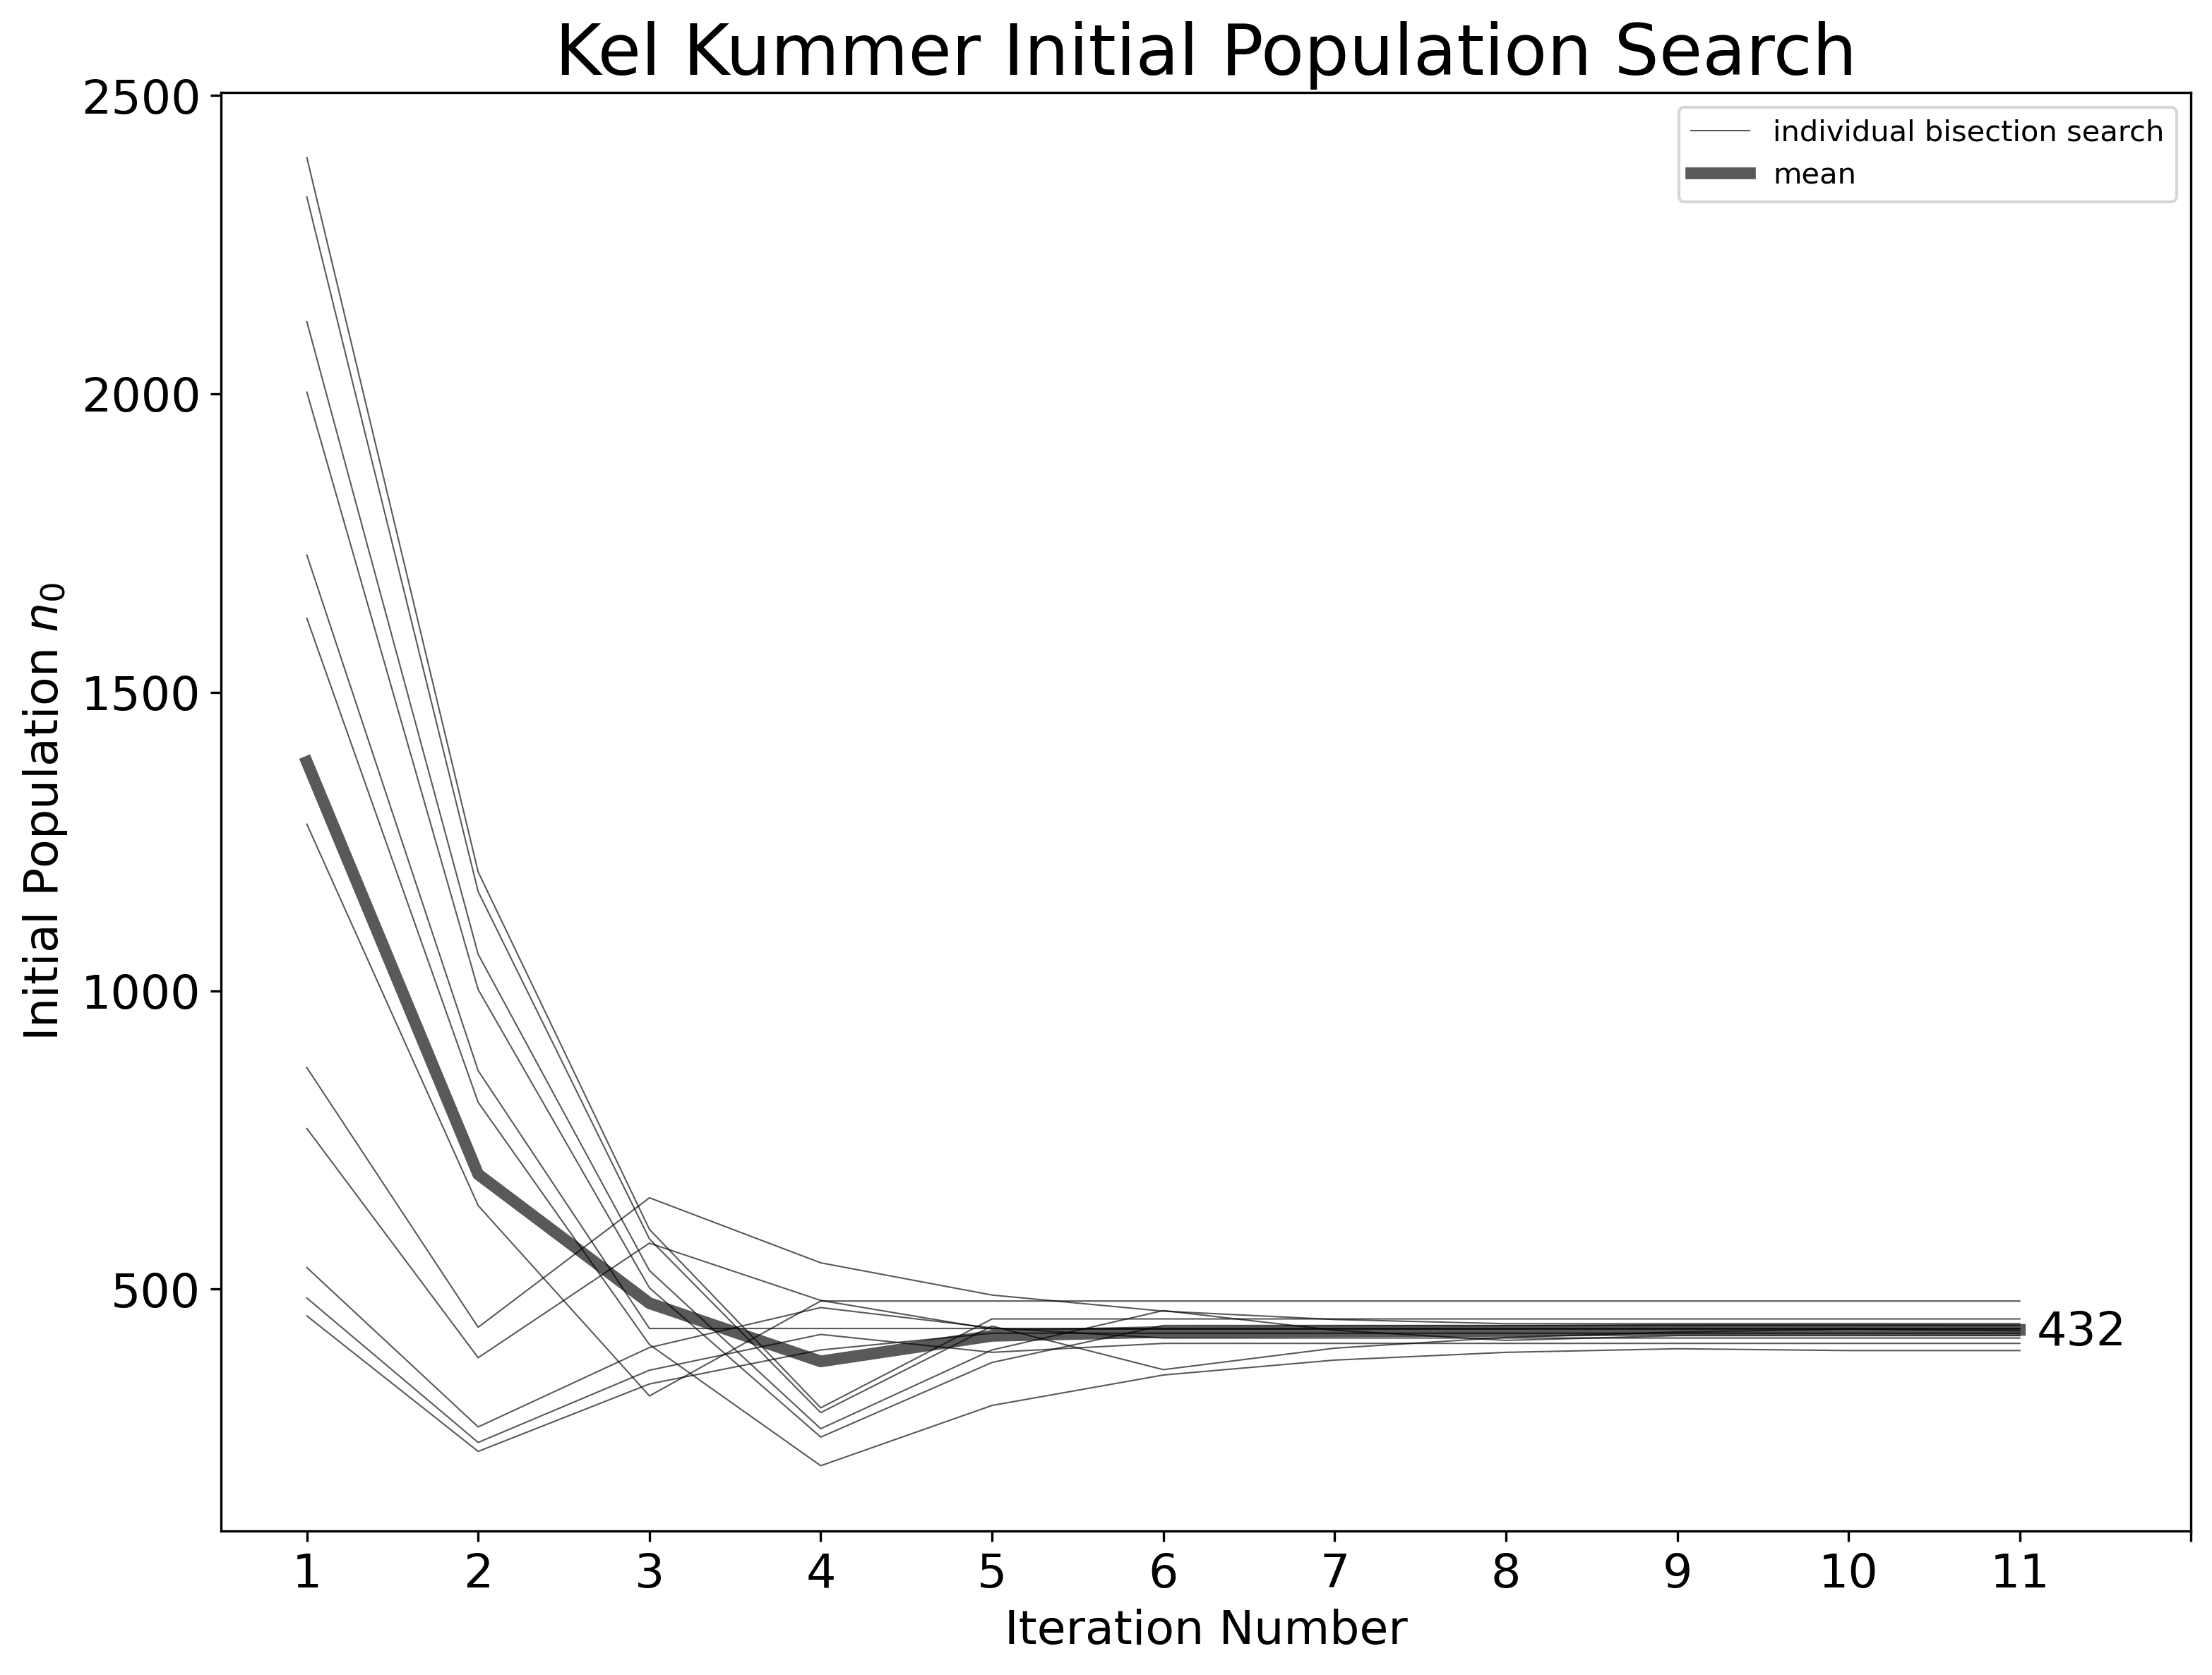

In [34]:
length = np.max([len(k) for k in to_plot])
for start_sizes in to_plot:
    while len(start_sizes) < length:
        start_sizes.append(start_sizes[-1])

fig = plt.figure(figsize=(12,9), dpi=300)
for k in range(len(to_plot) -1):
    plt.plot(to_plot[k], color='k', linewidth=0.5, alpha=0.65)

# plot the last one with a label
plt.plot(to_plot[-1], color='k', linewidth=0.5, alpha=0.65, label='individual bisection search')
# make the plot display in text the final average starting value
avg_run = np.mean(to_plot, axis=0)
plt.text(length - .9, avg_run[-1] - 25, str(round(avg_run[-1])), fontsize=16)
# now plot the average, bolded
plt.plot(avg_run, color='k', linewidth=4, alpha=0.65, label='mean')
plt.xticks([k for k in range(length + 1)], labels=[k for k in range(1, length+1)]+[''], fontsize=16)
plt.yticks(fontsize=16)
plt.title(name + ' Initial Population Search', fontsize=24)
plt.legend()
plt.ylabel(r'Initial Population $n_0$', fontsize=16)
plt.xlabel('Iteration Number', fontsize=16)
plt.savefig(os.path.join(out_dir, name + '_starting_size_graph.png'), format='png')